## Dataset para la nieve

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def filtrar_y_guardar_dataset(ruta_del_archivo, tipo_precipitacion, archivo_salida):
    df = pd.read_csv(ruta_del_archivo)

    df_snow = df[df['Precip Type'] == tipo_precipitacion]
    df_snow.to_csv(archivo_salida, index=False)

    print(f"Dataset filtrado solo con {tipo_precipitacion}: guardado como '{archivo_salida}'.")
    return df_snow

df_snow = filtrar_y_guardar_dataset('data.csv', 'snow', 'snow_only_dataset.csv')

Dataset filtrado solo con snow: guardado como 'snow_only_dataset.csv'.


In [3]:
df_snow.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1562,2006-12-13 02:00:00.000 +0100,Foggy,snow,-0.483333,-4.150000,1.00,11.0929,219.0,0.483,0.0,1031.56,Foggy throughout the day.
1563,2006-12-13 03:00:00.000 +0100,Foggy,snow,-0.483333,-4.061111,0.96,10.7387,200.0,0.322,0.0,1031.47,Foggy throughout the day.
1564,2006-12-13 04:00:00.000 +0100,Foggy,snow,-0.922222,-3.477778,1.00,7.0679,206.0,0.161,0.0,1031.23,Foggy throughout the day.
1565,2006-12-13 05:00:00.000 +0100,Foggy,snow,-1.038889,-4.400000,1.00,9.4990,199.0,0.161,0.0,1031.41,Foggy throughout the day.
1566,2006-12-13 06:00:00.000 +0100,Foggy,snow,-1.088889,-4.438889,1.00,9.4346,219.0,0.322,0.0,1031.98,Foggy throughout the day.


In [4]:
df_snow = df_snow.drop(columns=['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover','Apparent Temperature (C)' ])

In [5]:
df_snow.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1562,-0.483333,1.00,11.0929,219.0,0.483,1031.56
1563,-0.483333,0.96,10.7387,200.0,0.322,1031.47
1564,-0.922222,1.00,7.0679,206.0,0.161,1031.23
1565,-1.038889,1.00,9.4990,199.0,0.161,1031.41
1566,-1.088889,1.00,9.4346,219.0,0.322,1031.98


In [6]:

def matriz_correlacion():

    correlation_matrix_snow = df_snow.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix_snow, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación entre Variables - Dataset Original de Nieve')
    plt.show()


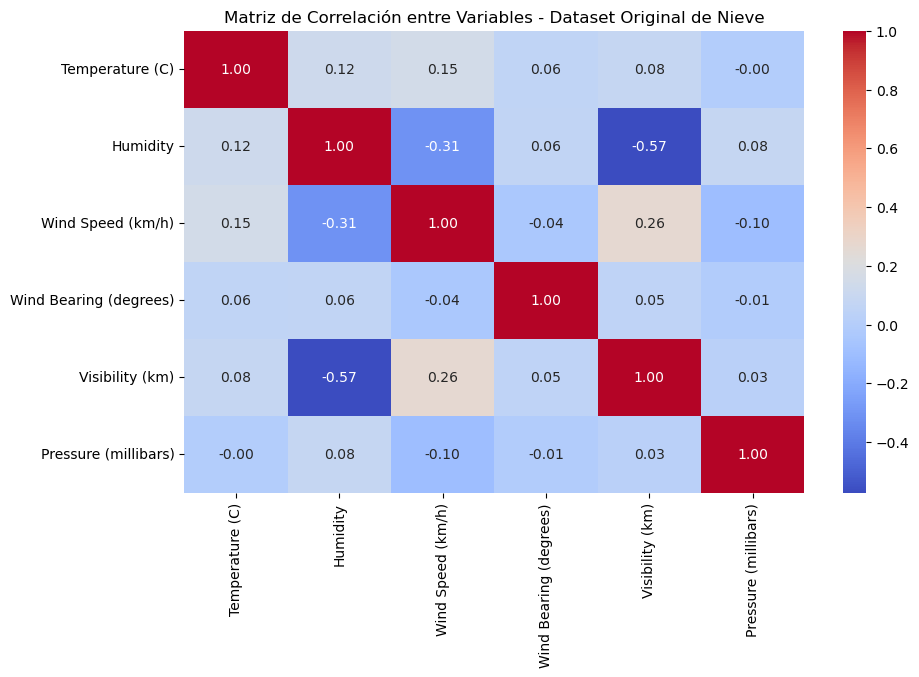

In [7]:
matriz_correlacion()

In [8]:
df_snow = df_snow.drop(columns=['Pressure (millibars)', 'Wind Bearing (degrees)', 'Temperature (C)'])

In [9]:
df_snow.head()

,Humidity,Wind Speed (km/h),Visibility (km)
1562,1.00,11.0929,0.483
1563,0.96,10.7387,0.322
1564,1.00,7.0679,0.161
1565,1.00,9.4990,0.161
1566,1.00,9.4346,0.322


In [10]:
def calcular_min_max(df):
    min_values = df.min()
    max_values = df.max()

    ranges_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

    print(ranges_df)

    return ranges_df

ranges_df = calcular_min_max(df_snow)


                   Min      Max
Humidity           0.0   1.0000
Wind Speed (km/h)  0.0  44.8868
Visibility (km)    0.0  16.1000


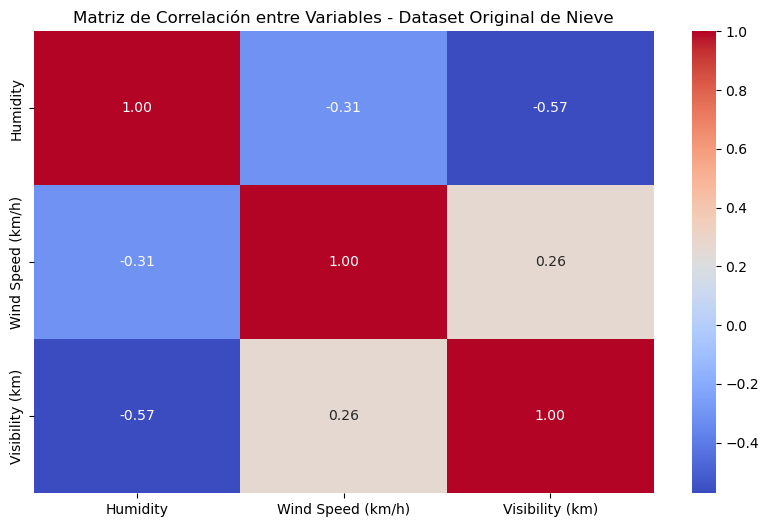

In [11]:
matriz_correlacion()

In [12]:


def resumen_dataset(df):

    estadisticas = df.describe()
    valores_nulos = df.isnull().sum()

    return estadisticas, valores_nulos

estadisticas, valores_nulos = resumen_dataset(df_snow)


In [13]:
print(estadisticas)

           Humidity  Wind Speed (km/h)  Visibility (km)
count  10712.000000       10712.000000     10712.000000
mean       0.863263           9.481998         6.636570
std        0.111007           6.532044         4.634747
min        0.000000           0.000000         0.000000
25%        0.810000           4.620700         2.978500
50%        0.880000           8.194900         5.973100
75%        0.930000          12.558000         9.982000
max        1.000000          44.886800        16.100000


In [14]:
print(valores_nulos)

Humidity             0
Wind Speed (km/h)    0
Visibility (km)      0
dtype: int64


In [15]:
def obtener_min_max(df, columna):
    
    min_val = df[columna].min()
    max_val = df[columna].max()
    return min_val, max_val

In [16]:
def interpolar_columna(df, columna_origen, min_origen, max_origen, columna_destino, min_destino, max_destino):
    df[columna_destino] = np.interp(df[columna_origen], [min_origen, max_origen], [min_destino, max_destino])
    return df

In [17]:
def procesar_interpolacion(df, columna_origen, columna_destino, min_destino, max_destino):
    min_origen, max_origen = obtener_min_max(df, columna_origen)
    return interpolar_columna(df, columna_origen, min_origen, max_origen, columna_destino, min_destino, max_destino)

In [18]:
df_snow = procesar_interpolacion(df_snow, 'Humidity', 'Emission Rate', 500, 10000)
df_snow = procesar_interpolacion(df_snow, 'Humidity', 'Start Size', 0.3, 1.0)
df_snow = procesar_interpolacion(df_snow, 'Humidity', 'UserIntensity', 0, 15)

In [19]:
df_snow.head()

,Humidity,Wind Speed (km/h),Visibility (km),Emission Rate,Start Size,UserIntensity
1562,1.00,11.0929,0.483,10000.0,1.000,15.0
1563,0.96,10.7387,0.322,9620.0,0.972,14.4
1564,1.00,7.0679,0.161,10000.0,1.000,15.0
1565,1.00,9.4990,0.161,10000.0,1.000,15.0
1566,1.00,9.4346,0.322,10000.0,1.000,15.0


In [20]:
df_snow.to_csv('df_snow.csv', index=False)


In [21]:

print(df_snow.describe())

           Humidity  Wind Speed (km/h)  Visibility (km)  Emission Rate  \
count  10712.000000       10712.000000     10712.000000   10712.000000   
mean       0.863263           9.481998         6.636570    8700.995612   
std        0.111007           6.532044         4.634747    1054.566469   
min        0.000000           0.000000         0.000000     500.000000   
25%        0.810000           4.620700         2.978500    8195.000000   
50%        0.880000           8.194900         5.973100    8860.000000   
75%        0.930000          12.558000         9.982000    9335.000000   
max        1.000000          44.886800        16.100000   10000.000000   

         Start Size  UserIntensity  
count  10712.000000   10712.000000  
mean       0.904284      12.948940  
std        0.077705       1.665105  
min        0.300000       0.000000  
25%        0.867000      12.150000  
50%        0.916000      13.200000  
75%        0.951000      13.950000  
max        1.000000      15.000000  


In [22]:
print(df_snow.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10712 entries, 1562 to 93506
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Humidity           10712 non-null  float64
 1   Wind Speed (km/h)  10712 non-null  float64
 2   Visibility (km)    10712 non-null  float64
 3   Emission Rate      10712 non-null  float64
 4   Start Size         10712 non-null  float64
 5   UserIntensity      10712 non-null  float64
dtypes: float64(6)
memory usage: 585.8 KB
None


In [23]:
corr_matrix = df_snow.corr()
print(corr_matrix)

                   Humidity  Wind Speed (km/h)  Visibility (km)  \
Humidity           1.000000          -0.313970        -0.572148   
Wind Speed (km/h) -0.313970           1.000000         0.264339   
Visibility (km)   -0.572148           0.264339         1.000000   
Emission Rate      1.000000          -0.313970        -0.572148   
Start Size         1.000000          -0.313970        -0.572148   
UserIntensity      1.000000          -0.313970        -0.572148   

                   Emission Rate  Start Size  UserIntensity  
Humidity                1.000000    1.000000       1.000000  
Wind Speed (km/h)      -0.313970   -0.313970      -0.313970  
Visibility (km)        -0.572148   -0.572148      -0.572148  
Emission Rate           1.000000    1.000000       1.000000  
Start Size              1.000000    1.000000       1.000000  
UserIntensity           1.000000    1.000000       1.000000  


In [24]:
cov_matrix = df_snow.cov()
print(cov_matrix)

                     Humidity  Wind Speed (km/h)  Visibility (km)  \
Humidity             0.012323          -0.227660        -0.294364   
Wind Speed (km/h)   -0.227660          42.667604         8.002693   
Visibility (km)     -0.294364           8.002693        21.480876   
Emission Rate      117.064257       -2162.773294     -2796.460275   
Start Size           0.008626          -0.159362        -0.206055   
UserIntensity        0.184838          -3.414905        -4.415464   

                   Emission Rate  Start Size  UserIntensity  
Humidity            1.170643e+02    0.008626       0.184838  
Wind Speed (km/h)  -2.162773e+03   -0.159362      -3.414905  
Visibility (km)    -2.796460e+03   -0.206055      -4.415464  
Emission Rate       1.112110e+06   81.944980    1755.963850  
Start Size          8.194498e+01    0.006038       0.129387  
UserIntensity       1.755964e+03    0.129387       2.772575  


In [25]:
from scipy.stats import pearsonr, spearmanr

def calcular_correlaciones(df, columna_x, columnas_y):

    resultados = {}
    
    for columna_y in columnas_y:

        pearson_corr, p_value_pearson = pearsonr(df[columna_x], df[columna_y])

        spearman_corr, p_value_spearman = spearmanr(df[columna_x], df[columna_y])
 
        resultados[columna_y] = {
            'Pearson': (pearson_corr, p_value_pearson),
            'Spearman': (spearman_corr, p_value_spearman)
        }

        print(f"Correlación de Pearson ({columna_x} vs {columna_y}): {pearson_corr:.4f}, p-valor: {p_value_pearson:.4e}")
        print(f"Correlación de Spearman ({columna_x} vs {columna_y}): {spearman_corr:.4f}, p-valor: {p_value_spearman:.4e}\n")
    
    return resultados

resultados_correlacion = calcular_correlaciones(df_snow, 'UserIntensity', ['Wind Speed (km/h)', 'Visibility (km)'])


Correlación de Pearson (UserIntensity vs Wind Speed (km/h)): -0.3140, p-valor: 1.0777e-243
Correlación de Spearman (UserIntensity vs Wind Speed (km/h)): -0.2881, p-valor: 8.8589e-204

Correlación de Pearson (UserIntensity vs Visibility (km)): -0.5721, p-valor: 0.0000e+00
Correlación de Spearman (UserIntensity vs Visibility (km)): -0.6785, p-valor: 0.0000e+00

